# Predict the Credit_Mix category for a customer based on their financial data, and provide actionable insights to improve credit health.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Bank%20Data.csv'
df = pd.read_csv(url)


In [4]:
features = ['Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Credit_Mix','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
df2 = df[features]
df2 = df2[df2['Credit_Mix']!='_']

# Project Workflow

In order to do this project, must follow this structure....

## 1. Data Preprocessing
- Handle missing and invalid values in the dataset.
- Encode categorical variables appropriately.
- Scale and normalize numeric features for uniformity.
- Detect and address outliers to improve model stability.

In [5]:
import re
def extract_float(value):
    match = re.match(r'^-?\d+(\.\d+)?$', value)
    return float(match.group()) if match else 0
df2['Monthly_Inhand_Salary'] = df2['Monthly_Inhand_Salary'].fillna(0)
df2['Num_of_Loan'] = df2['Num_of_Loan'].apply(lambda x: extract_float(x))
df2['Num_of_Delayed_Payment'] = df2['Num_of_Delayed_Payment'].fillna(0).str.replace(r'[^0-9]', '', regex=True).astype(float)
df2['Num_of_Delayed_Payment'] = df2['Num_of_Delayed_Payment'].fillna(0).astype(int)
df2['Amount_invested_monthly'] = df2['Amount_invested_monthly'].fillna(0)
df2['Changed_Credit_Limit'] = df2['Changed_Credit_Limit'].str.extract('(\d+\.?\d*)')
df2['Changed_Credit_Limit'] = df2['Changed_Credit_Limit'].fillna(0).astype(float)
df2['Outstanding_Debt'] = df2['Outstanding_Debt'].apply(lambda x: extract_float(x))

In [6]:
def extract_float_2(value):
    value = str(value)
    match = re.match(r'^-?\d+(\.\d+)?$', value)
    return float(match.group()) if match else 0
df2['Monthly_Balance'] = df2['Monthly_Balance'].apply(lambda x: extract_float_2(x))

df2['Amount_invested_monthly'] = df2['Amount_invested_monthly'].apply(lambda x: extract_float_2(x))

## 2. Exploratory Data Analysis (EDA)
- Perform descriptive statistics to understand the data distribution.
- Visualize relationships between features and the target variable.
- Analyze correlations and identify trends or anomalies in the data.

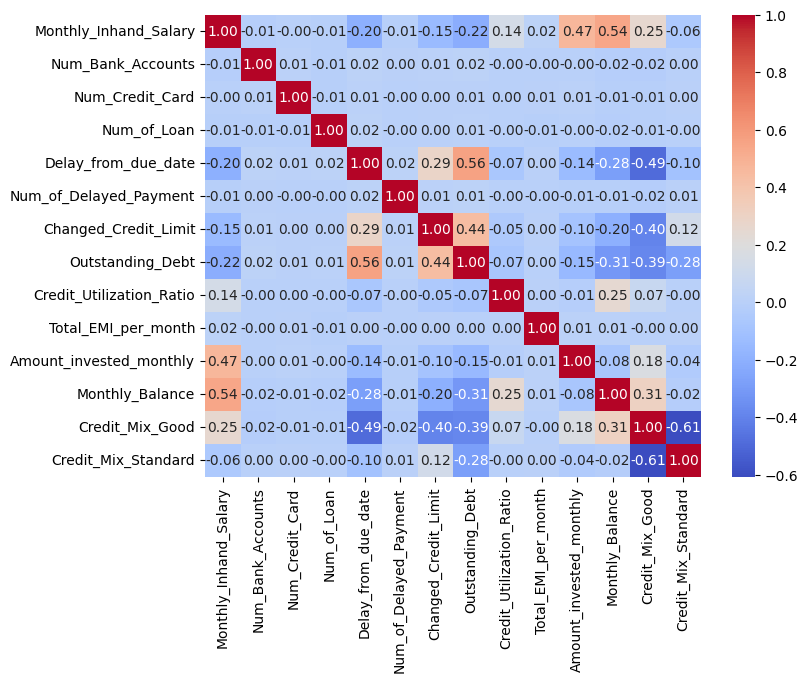

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df3 = df2.copy()
df3 = pd.get_dummies(df3, columns=['Credit_Mix'], drop_first=True)
crr = df3.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(crr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## 3. Model Building
- Train multiple machine learning models using the preprocessed data.
- Evaluate the suitability of various models for the task.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc


label_encoder = LabelEncoder()

df3 = df2.copy()
df3['Credit_Mix_encoded'] = label_encoder.fit_transform(df3['Credit_Mix'])

feature_col = ['Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
X = df3[feature_col]
y = df3['Credit_Mix_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Num_of_Loan  \
0                1824.843333                  3                4          4.0   
1                1824.843333                  3                4          4.0   
2                1824.843333                  3                4          4.0   
3                   0.000000                  3                4          4.0   
4                3037.986667                  2                4          1.0   
...                      ...                ...              ...          ...   
49993            1929.906667                 10                8          5.0   
49994            1929.906667                 10                8          5.0   
49996               0.000000                  4                6          0.0   
49997            3359.415833                  4                6          2.0   
49998               0.000000                  4                6          0.0   

       Delay_from_due_date 

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [16]:
# svm = 0.817
#svm_2 = 0.76
# svm = SVC(kernel='rbf', probability=True, random_state=42)
svm2 = SVC(kernel='poly', degree=4)
# svm.fit(X_train_scaled, y_train)
svm2.fit(X_train_scaled, y_train)
# y_pred_svm = svm.predict(X_test_scaled)
y_pred_svm = svm2.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Acc:", accuracy)

print("Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

Acc: 0.7285732056225899
Report:
               precision    recall  f1-score   support

         Bad       0.93      0.72      0.81      1937
        Good       0.80      0.48      0.60      2434
    Standard       0.65      0.90      0.75      3668

    accuracy                           0.73      8039
   macro avg       0.79      0.70      0.72      8039
weighted avg       0.76      0.73      0.72      8039



## 4. Model Evaluation
- Compute and plot evaluation metrics for all models, such as accuracy, precision, recall, F1-score, and AUC-ROC.
- Compare the performance of models across multiple metrics.


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Acc:", accuracy)

print("Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Acc: 0.9290956586640129
Report:
               precision    recall  f1-score   support

         Bad       0.96      0.97      0.97      1937
        Good       0.94      0.87      0.91      2434
    Standard       0.90      0.95      0.92      3668

    accuracy                           0.93      8039
   macro avg       0.94      0.93      0.93      8039
weighted avg       0.93      0.93      0.93      8039



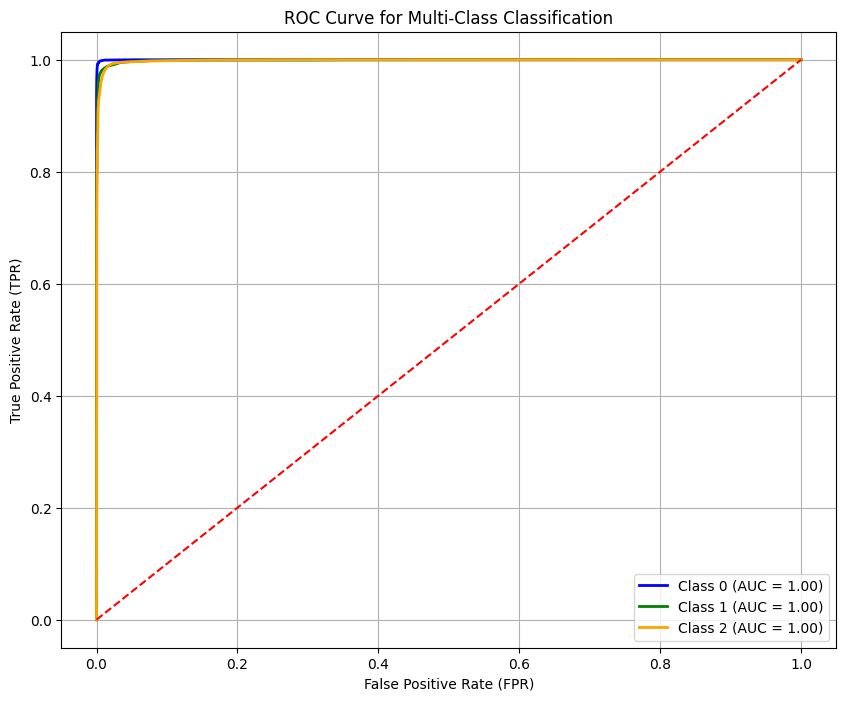

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
classes = [0, 1, 2]
y_bin = label_binarize(y, classes=classes)

y_probs = model.predict_proba(X)
fpr = {}
tpr = {}
roc_auc = {}


for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for Multi-Class Classification')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

## 5. Hyperparameter Tuning
- Optimize hyperparameters for each model using systematic search methods.
- Identify the best configuration for improved performance.


In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

rf = RandomForestClassifier(n_estimators=300, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

rf.fit(X_train, y_train)

y_pred_rf = model.predict(X_test)


In [19]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Acc:", accuracy)

print("Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Acc: 0.9290956586640129
Report:
               precision    recall  f1-score   support

         Bad       0.96      0.97      0.97      1937
        Good       0.94      0.87      0.91      2434
    Standard       0.90      0.95      0.92      3668

    accuracy                           0.93      8039
   macro avg       0.94      0.93      0.93      8039
weighted avg       0.93      0.93      0.93      8039



## 6. Retrain Models
- Retrain all models using the optimal hyperparameters on the training data.
- Validate the models on unseen data to ensure robustness.

## 7. Final Performance and Cross-Validation
- Evaluate the final performance of each model using cross-validation scores.
- Compare results to select the best-performing model.


## 8. Suggestions
- Provide recommendations based on the model insights and analysis.
- Suggest actionable steps to improve outcomes or address any gaps identified during the project.


In [ ]:
#1. Random Forest
#2. SVM
#3. Logistic Regression